In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Date Preprocessing, Understanding and Exploration

####  Load dataset

In [3]:
df = pd.read_csv("data/US_Accidents_Dec20_updated.csv")


In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2953938,2,2020-11-01 22:33:04,2020-11-02 00:11:16,39.594265,-76.671599,39.588595,-76.675189,0.436,Incident on I-83 SB near EXIT 27 Road closed. ...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2953939,2,2020-12-14 14:19:00,2020-12-14 17:06:29,37.701913,-121.910487,37.701983,-121.917087,0.361,WB 580 JEO 680. SV BIG RIG FB TRLR,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-2953941,2,2020-10-15 23:03:55,2020-10-16 00:20:53,39.446521,-76.330792,39.455652,-76.312348,1.169,Incident on I-95 NB near EXIT 74 Drive with ca...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-2953942,2,2020-12-01 14:15:55,2020-12-01 16:15:42,39.221910,-76.801697,39.228970,-76.811217,0.705,Incident on MD-100 WB near EXIT 2 Drive with c...,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2953943,4,2020-10-17 18:08:00,2020-10-17 20:11:27,39.587999,-77.643910,39.600499,-77.677250,1.974,I-70 WEST AT MM 33.0,...,False,False,False,False,False,False,Day,Day,Day,Day


#### Data description

In [5]:
print('Rows     :', df.shape[0])
print('Columns  :', df.shape[1])
print('\nFeatures :\n     :', df.columns.tolist())
print('\nMissing values    :', df.isnull().values.sum())
print('\nUnique values :  \n', df.nunique())

Rows     : 1034742
Columns  : 47

Features :
     : ['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Missing values    : 1101126

Unique values :  
 ID                       1034742
Severity                       4
Start_Time                662179
End_Time                  785318
Start_Lat                 429003
Start_Lng                 436283
End_Lat                   426758
End_Lng   

Delete columns that are not useful in our analysis and modeling

In [6]:
df.shape

(1034742, 47)

### Data Cleaing

#### Drop features with high missing value rate 

In [4]:
df.drop(['ID','Description','Country','Zipcode', 'Turning_Loop','Number','Street',
         'Airport_Code','Weather_Timestamp','Wind_Chill(F)','Wind_Direction',
        'Civil_Twilight', 'Nautical_Twilight', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng'], axis=1, inplace=True)
df.shape

(1034742, 35)

#### Missing values visualization

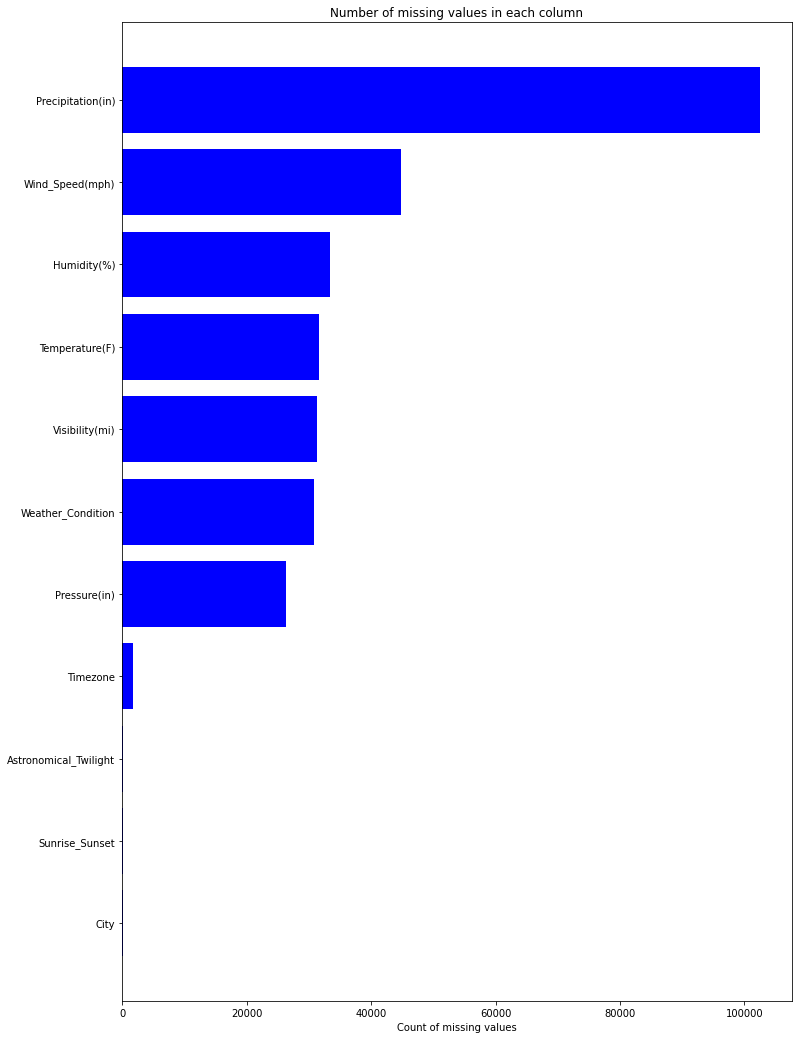

In [5]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind,missing_df.missing_count.values,color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

#### Fill missing values with proper values

In [6]:
df["Precipitation(in)"].fillna(0, inplace=True)
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median())
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())
df['Pressure(in)'] = df['Pressure(in)'].fillna(df['Pressure(in)'].median())

#### Drop the rest of missing values

In [7]:
df = df[df['Weather_Condition'].notna()]

In [8]:
df = df[df['City'].notna()]

In [9]:
df.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Side                     0
City                     0
County                   0
State                    0
Timezone                 0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset           0
Astronomical_Twilight    0
dtype: int64

In [13]:
# new dataframe shape
df.shape

(1003813, 35)

### Analysis

We want to explore data to find features affecting the accident severity

In [87]:
df.groupby('Severity').size()

Severity
1     27791
2    851351
3     75055
4     49616
dtype: int64

In [90]:
df['Severity'].value_counts()

2    851351
3     75055
4     49616
1     27791
Name: Severity, dtype: int64

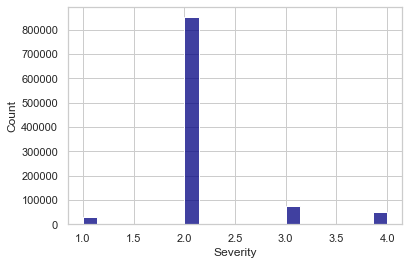

In [101]:
sev_p = sns.histplot(df, x="Severity", color = 'navy')

### Weather Condition Analysis

In [94]:
df.loc[df["Severity"] == 1]['Weather_Condition'].value_counts()

Fair                         13900
Mostly Cloudy                 4683
Cloudy                        3506
Partly Cloudy                 2648
Light Rain                    1385
Rain                           271
Fair / Windy                   231
Fog                            195
Mostly Cloudy / Windy          136
Partly Cloudy / Windy           85
Heavy Rain                      80
Light Drizzle                   75
Cloudy / Windy                  72
Haze                            70
Light Rain with Thunder         64
Light Snow                      64
T-Storm                         62
Heavy T-Storm                   45
Thunder                         45
Thunder in the Vicinity         30
Light Rain / Windy              29
Snow                            27
Rain / Windy                    13
Heavy Rain / Windy              10
Blowing Dust / Windy             8
Heavy T-Storm / Windy            7
Showers in the Vicinity          7
Light Rain Shower                6
Shallow Fog         

#### Find distribution of diffrent weather conditions

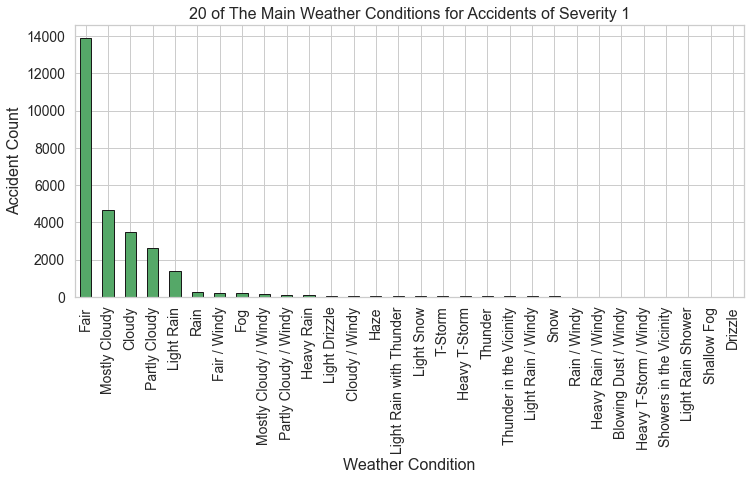

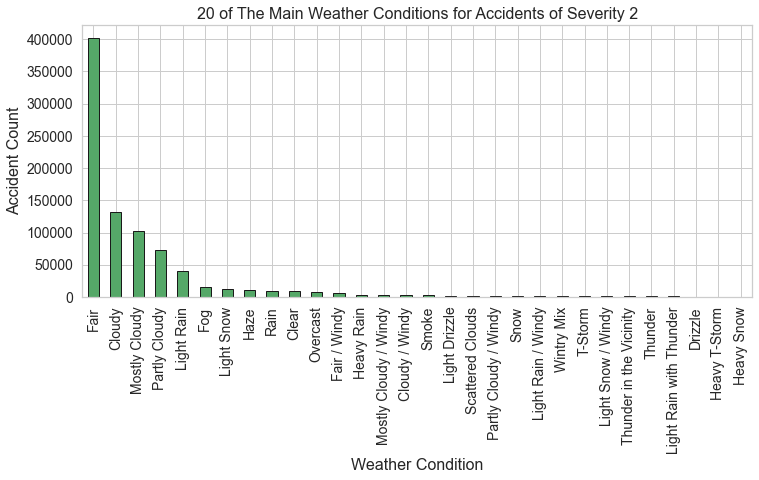

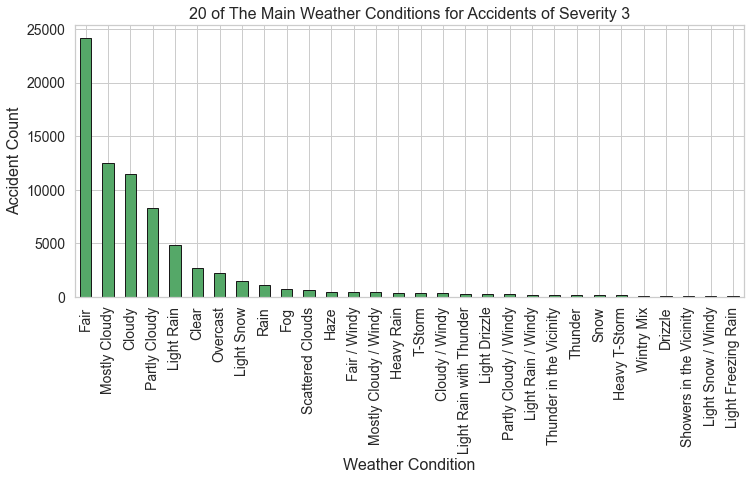

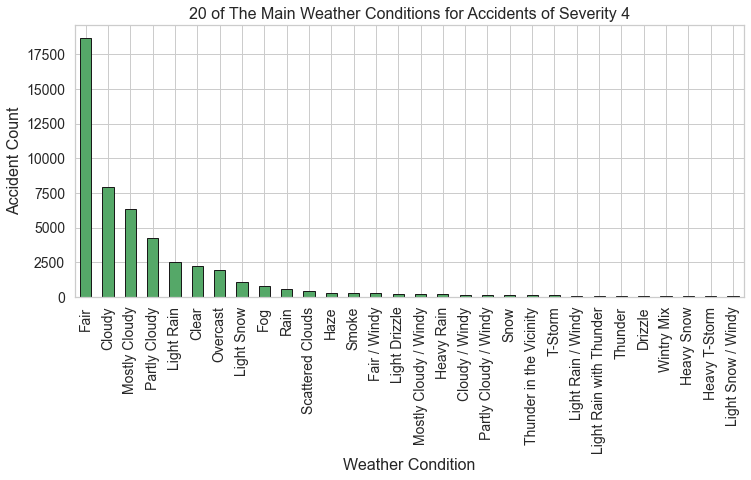

In [95]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

#### Explore bad weather conditions on number of accidents by Severty

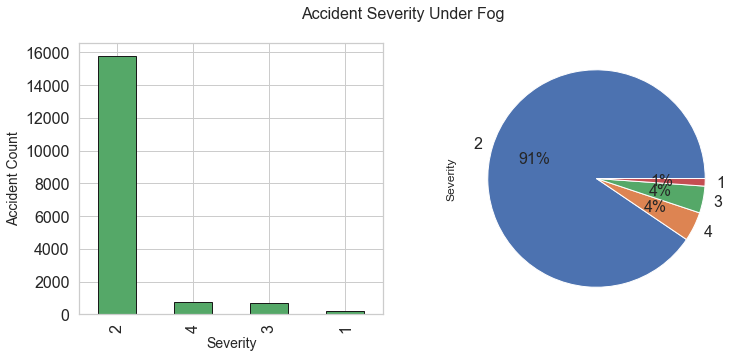

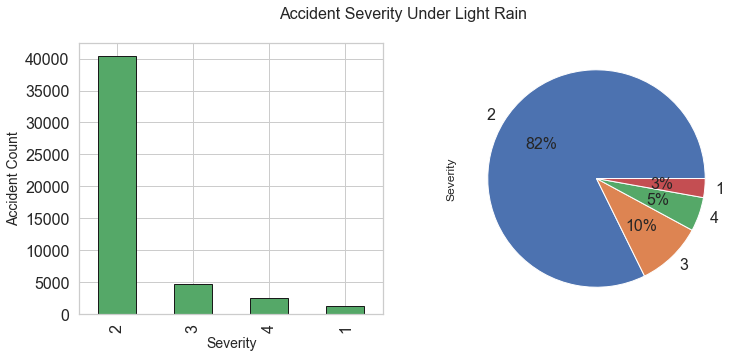

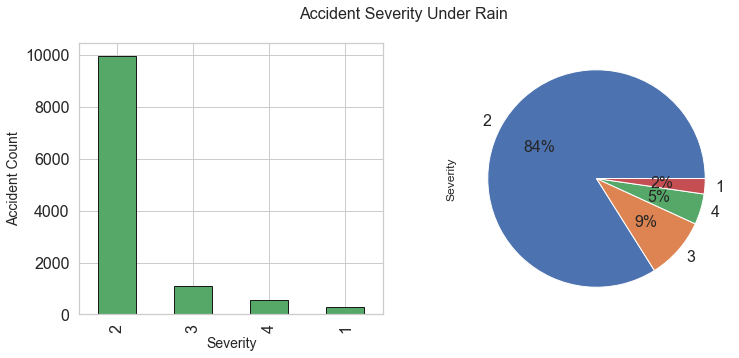

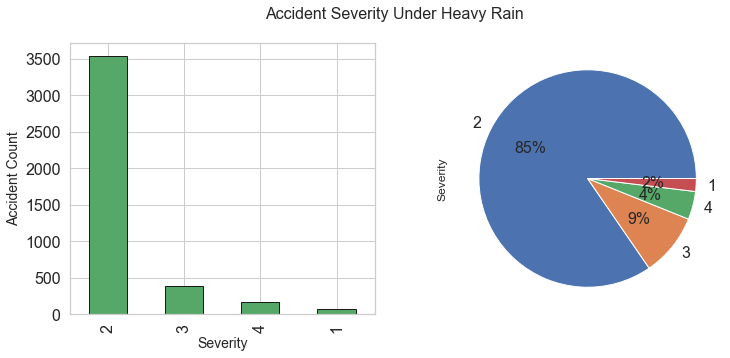

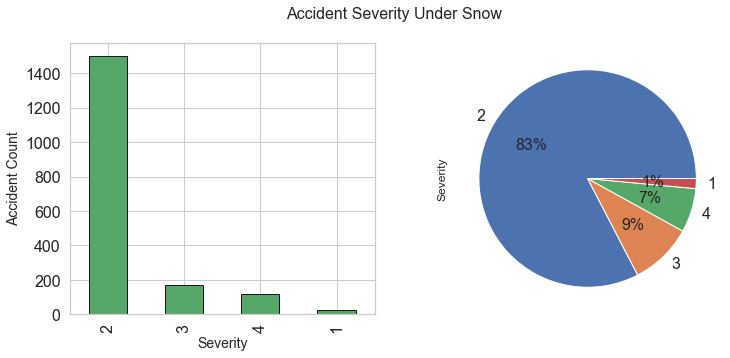

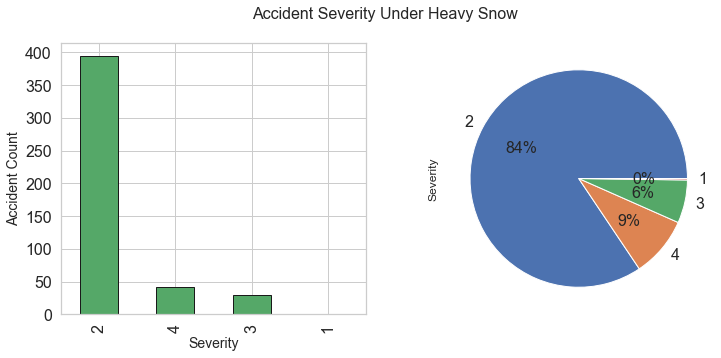

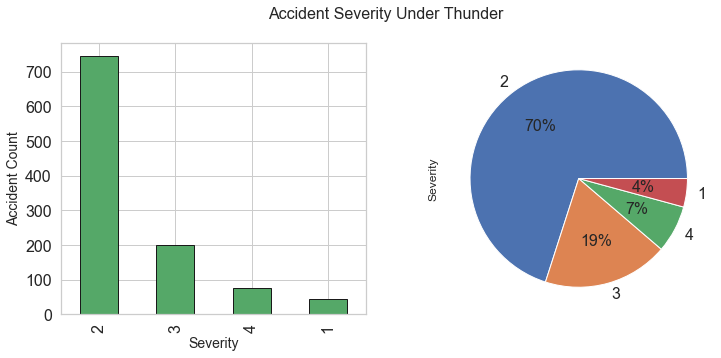

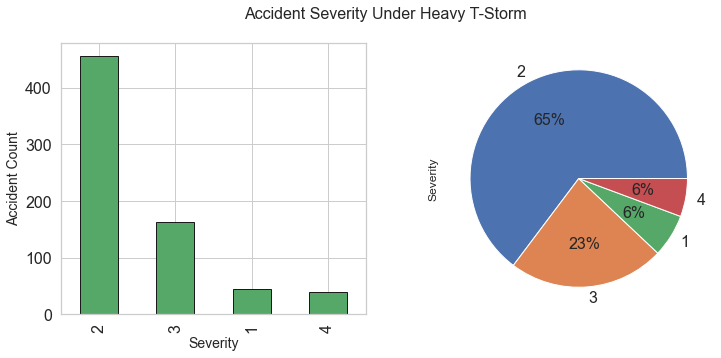

In [96]:
for s in ["Fog","Light Rain","Rain","Heavy Rain","Snow", "Heavy Snow", "Thunder", "Heavy T-Storm"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=14)
    plt.ylabel('Accident Count',fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

In [100]:
df.loc[df["Severity"] == 1]['Temperature(F)']

51        103.0
2058       95.0
17933      68.0
20606      98.0
22519      95.0
          ...  
765992     50.0
765993     46.0
765995     46.0
765996     49.0
765997     46.0
Name: Temperature(F), Length: 27791, dtype: float64

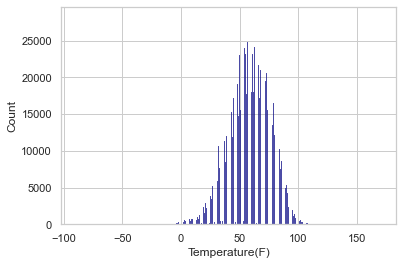

In [102]:
sev_tem = sns.histplot(df, x="Temperature(F)", color = 'navy')

#### Joint Distribution Temperature by Severity

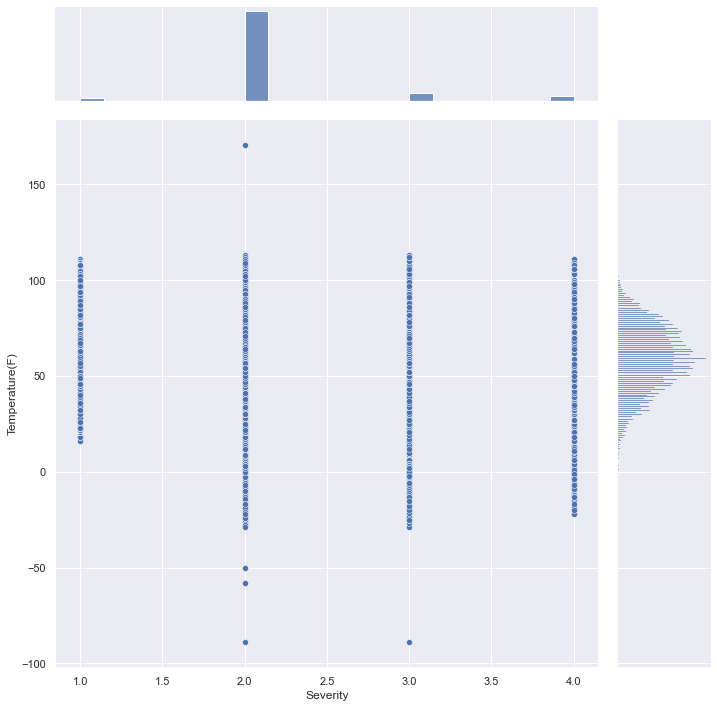

In [107]:
sns.jointplot(x = "Severity", y = "Temperature(F)", data = df, height=10)
plt.show()

In [108]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Side', 'City', 'County', 'State',
       'Timezone', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Astronomical_Twilight', 'time'],
      dtype='object')

#### Joint Distribution Humidity by Severity

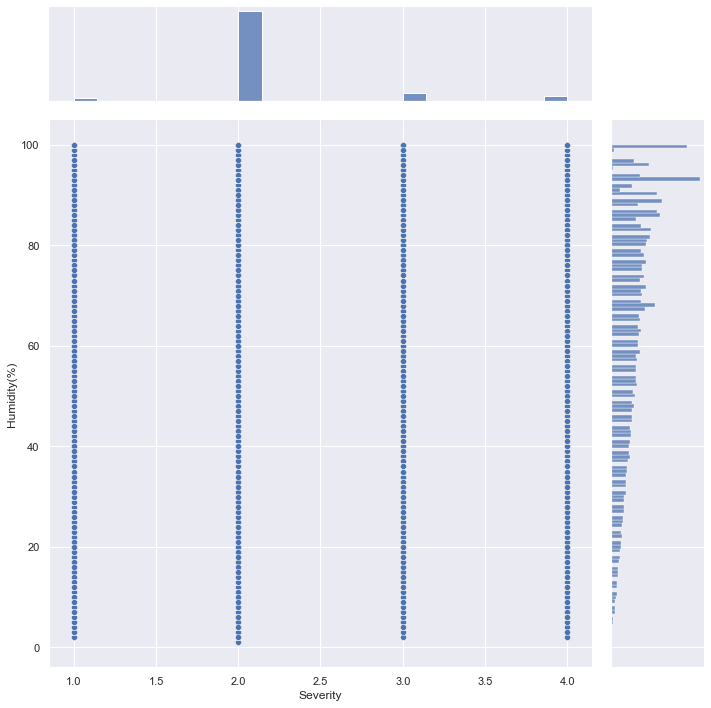

In [109]:
sns.jointplot(x = "Severity", y = "Humidity(%)", data = df, height=10)
plt.show()

### Time Analysis
exploring the severty of accident by day of the week

In [16]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')

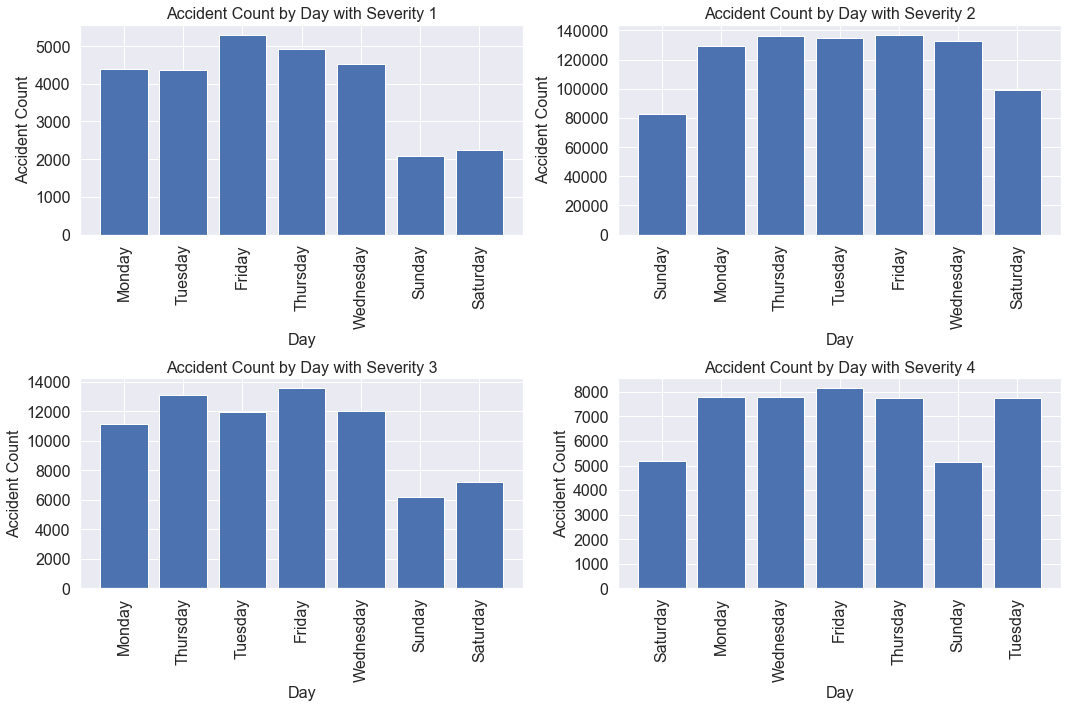

In [121]:
df['WeekDay'] = df['time'].dt.strftime('%A')
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(df.loc[df["Severity"] == s]['WeekDay'], bins=[0,1,2,3,4,5,6,7], align='left', rwidth=0.8)
    plt.title("Accident Count by Day with Severity " + str(s), fontsize=16)
    plt.xticks(rotation = 90)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

### Infrastructure Analysis

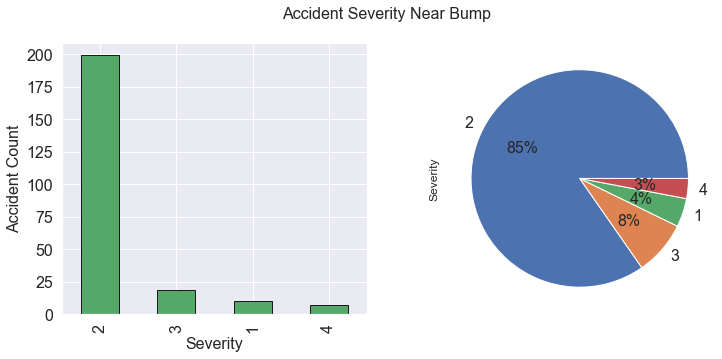

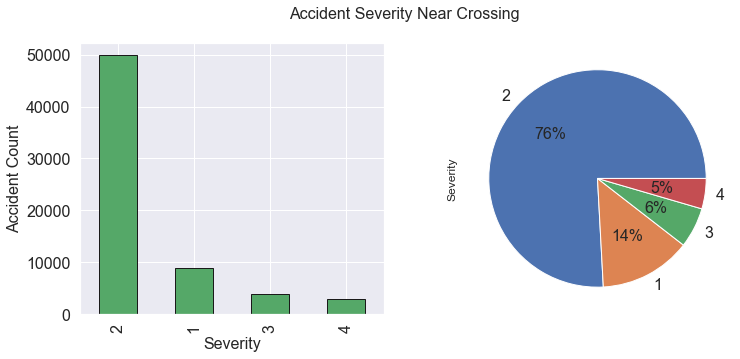

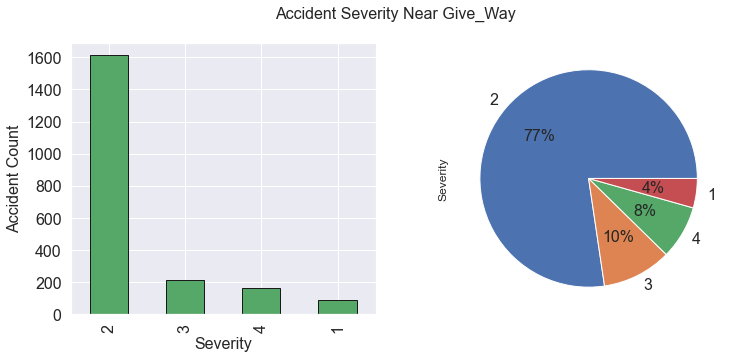

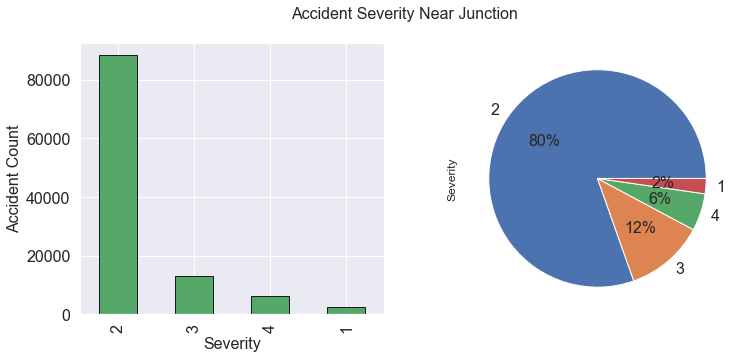

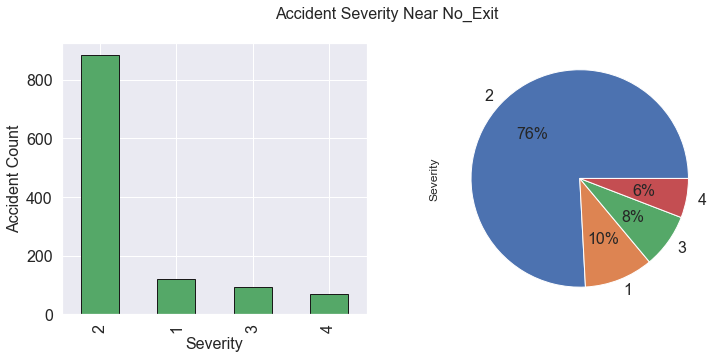

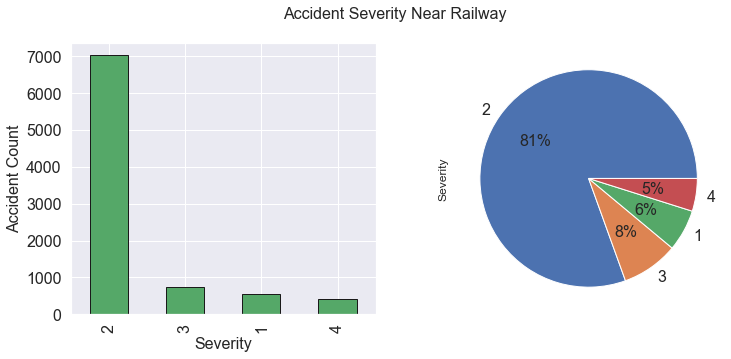

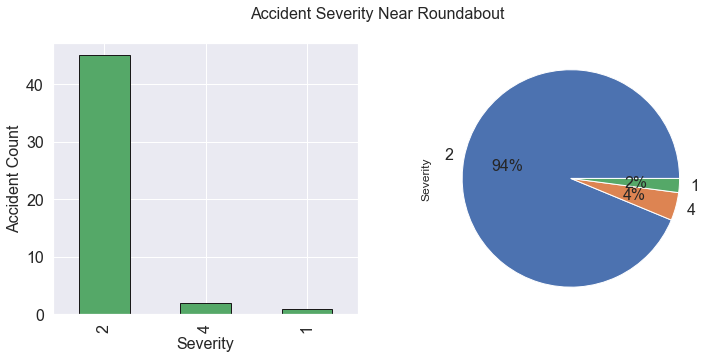

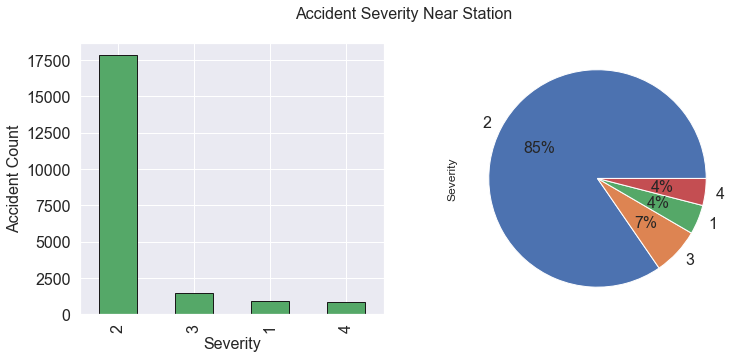

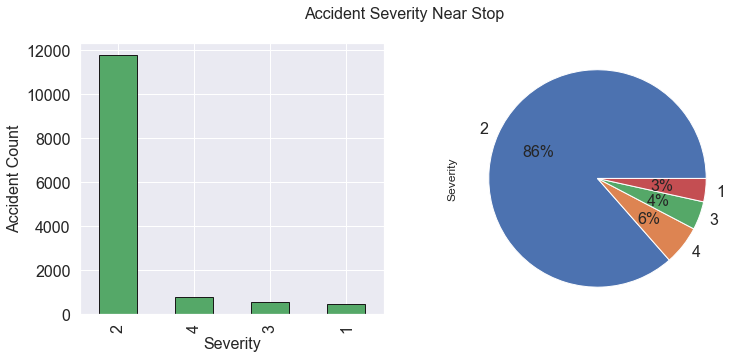

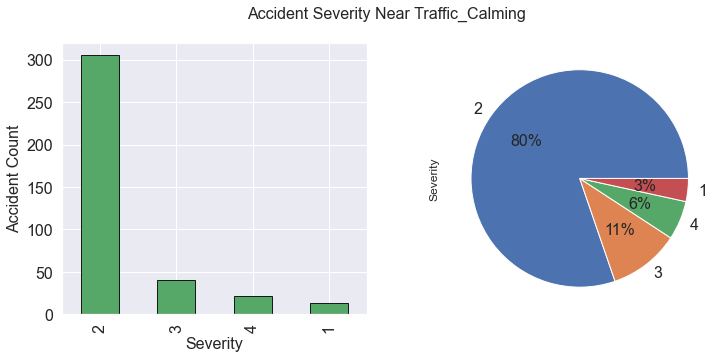

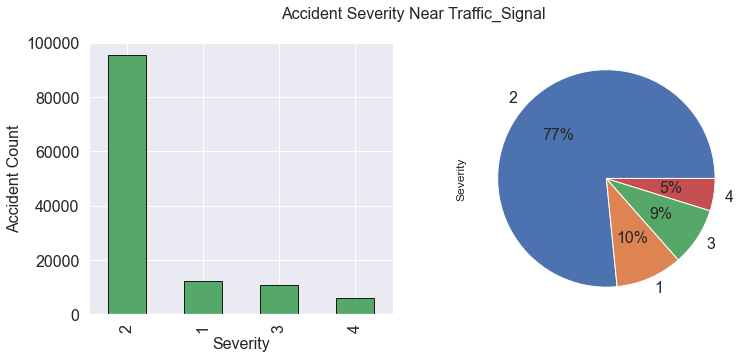

In [124]:
for s in ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']:
    # check if infrastructure type is found in any record 
    if (df[s] == True).sum() > 0:
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + s,fontsize=16)
        plt.subplot(1,2,1)
        df.loc[df[s] == True]['Severity'].value_counts().plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        df.loc[df[s] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

### Geographical Analysis Analysis

#### Severity by each state

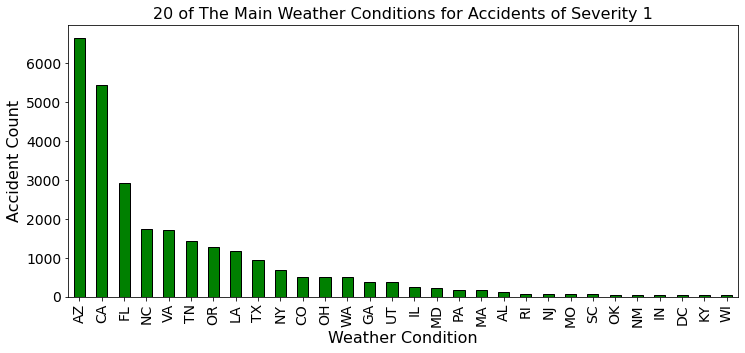

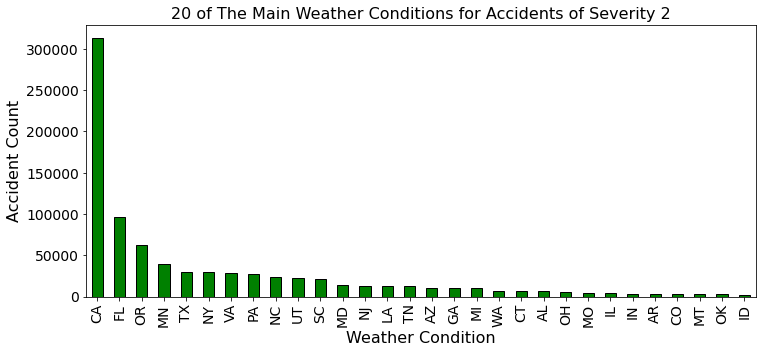

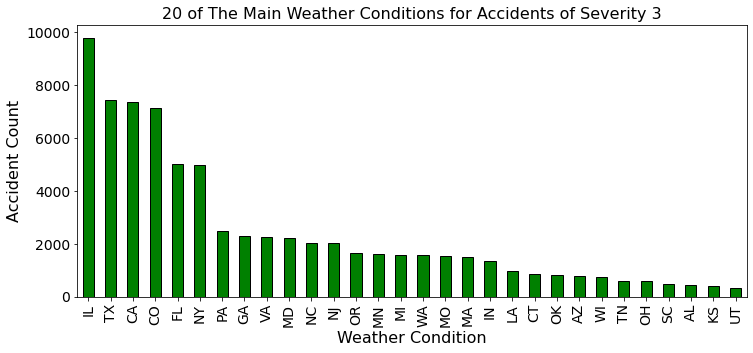

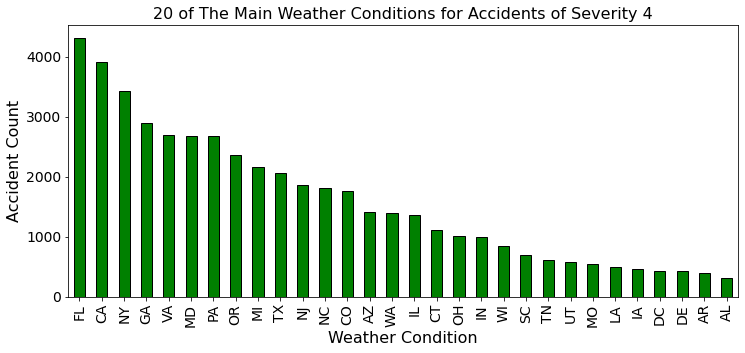

In [10]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['State'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='g',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

In [59]:
df.columns

Index(['Distance(mi)', 'Side', 'State', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Astronomical_Twilight', 'WeekDay', 'numeric_DayOfWeek',
       'FinalSeverity'],
      dtype='object')

In [53]:
df.head()

,Distance(mi),Side,City,County,State,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Astronomical_Twilight,WeekDay,numeric_DayOfWeek,FinalSeverity
0,0.436,R,Parkton,Baltimore County,MD,US/Eastern,39.0,49.0,29.09,10.0,...,False,False,False,False,False,Night,Night,Sunday,6,0
1,0.361,R,Dublin,Alameda,CA,US/Pacific,57.0,47.0,29.80,10.0,...,False,False,False,False,False,Day,Day,Monday,0,0
2,1.169,R,Joppa,Harford,MD,US/Eastern,68.0,88.0,29.96,10.0,...,False,False,False,False,False,Night,Night,Thursday,3,0
3,0.705,R,Ellicott City,Howard,MD,US/Eastern,44.0,45.0,29.55,10.0,...,False,False,False,False,False,Day,Day,Tuesday,1,0
4,1.974,R,Hagerstown,Washington,MD,US/Eastern,59.0,29.0,29.57,10.0,...,False,False,False,False,False,Day,Day,Saturday,5,1


## Feature Engineering

#### From the features related to time we just need day of the week.
Creating numeric value and drop the rest of columns

In [ ]:
df['numeric_DayOfWeek'] = df['time'].dt.dayofweek

In [47]:
df['numeric_DayOfWeek'].head()

0    6
1    0
2    3
3    1
4    5
Name: numeric_DayOfWeek, dtype: int64

Drop the rest of time columns

In [49]:
df.drop(['Start_Time', 'End_Time', 'time','Timezone','WeekDay'], axis=1, inplace=True)
df.shape

(1003813, 34)

Obviously, city and county are a subset of state, so we will drop those.

In [56]:
df.drop(['City','County'], axis=1, inplace=True)
df.shape

(1003813, 28)

In [61]:
df.columns

Index(['Distance(mi)', 'Side', 'State', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Astronomical_Twilight', 'WeekDay', 'numeric_DayOfWeek',
       'FinalSeverity'],
      dtype='object')

In [79]:
df['Sunrise_Sunset'].head()

0    Night
1      Day
2    Night
3      Day
4      Day
Name: Sunrise_Sunset, dtype: object

### Handeling the Catorigal data

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In [ ]:
# Side, State, Weather_Condition
#BOOLIAN Amenity, Bump, Crossing

#### Check the columns type

In [86]:
for i in df.columns:
    print(i+": "+str(df[i].dtype))

Distance(mi): float64
Side: object
State: object
Temperature(F): float64
Humidity(%): float64
Pressure(in): float64
Visibility(mi): float64
Wind_Speed(mph): float64
Precipitation(in): float64
Amenity: bool
Bump: bool
Crossing: bool
Give_Way: bool
Junction: bool
No_Exit: bool
Railway: bool
Roundabout: bool
Station: bool
Stop: bool
Traffic_Calming: bool
Traffic_Signal: bool
Sunrise_Sunset: object
Astronomical_Twilight: object
numeric_DayOfWeek: int64
FinalSeverity: int64
Amenity_num: int64


#### Label encoding for boolean features

In [83]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [87]:
df['Amenity_num'] = labelencoder.fit_transform(df['Amenity'])
df['Bump_num'] = labelencoder.fit_transform(df['Bump'])
df['Crossing_num'] = labelencoder.fit_transform(df['Crossing'])
df['Give_Way_num'] = labelencoder.fit_transform(df['Give_Way'])
df['Junction_num'] = labelencoder.fit_transform(df['Junction'])
df['No_Exit_num'] = labelencoder.fit_transform(df['No_Exit'])
df['Railway_num'] = labelencoder.fit_transform(df['Railway'])
df['Roundabout_num'] = labelencoder.fit_transform(df['Roundabout'])
df['Station_num'] = labelencoder.fit_transform(df['Station'])
df['Stop_num'] = labelencoder.fit_transform(df['Stop'])
df['Traffic_Calming_num'] = labelencoder.fit_transform(df['Traffic_Calming'])
df['Traffic_Signal_num'] = labelencoder.fit_transform(df['Traffic_Signal'])

### Target value

In this study we want to find the major severity and split our target in two class

In [44]:
### definig the major severity by analyzing the length of the road extent affected by the accident. 

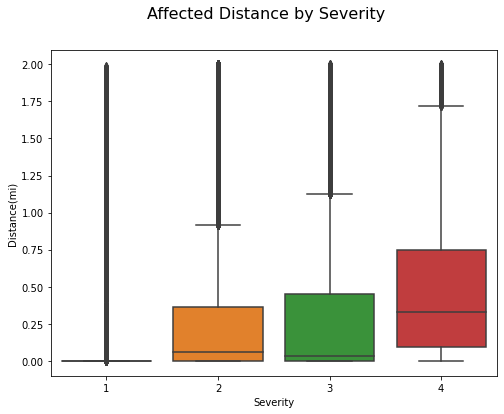

In [45]:
fig, axs = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Severity", y="Distance(mi)", 
            data=df.loc[df['Distance(mi)']<2],ax=axs)
fig.suptitle('Affected Distance by Severity', fontsize=16)

plt.show()

Based on the result, the accidents with severity level 4 are much more serious than accidents of other levels. So I want to slit up the levels of severity into two levels, level 4 and other levels.

In [46]:
df['FinalSeverity'] = 0
df.loc[df['Severity'] == 4, 'FinalSeverity'] = 1
df = df.drop(['Severity'], axis = 1)
df.FinalSeverity.value_counts()

0    954197
1     49616
Name: FinalSeverity, dtype: int64